# New Term Topics Methods and Document Coloring


In [4]:
from gensim.corpora import Dictionary
from gensim.models import ldamodel
import numpy
%matplotlib inline

### Creating corpus

In [5]:
texts = [['bank','river','shore','water'],
        ['river','water','flow','fast','tree'],
        ['bank','water','fall','flow'],
        ['bank','bank','water','rain','river'],
        ['river','water','mud','tree'],
        ['money','transaction','bank','finance'],
        ['bank','borrow','money'], 
        ['bank','finance'],
        ['finance','money','sell','bank'],
        ['borrow','sell'],
        ['bank','loan','sell']]

dictionary = Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]

### Show the topics that construct the corpus

In [6]:
numpy.random.seed(1) # setting random seed to get the same results each time.
model = ldamodel.LdaModel(corpus, id2word=dictionary, num_topics=2)
model.show_topics()

[(0,
  u'0.164*"bank" + 0.142*"water" + 0.108*"river" + 0.076*"flow" + 0.067*"borrow" + 0.063*"sell" + 0.060*"tree" + 0.048*"money" + 0.046*"fast" + 0.044*"rain"'),
 (1,
  u'0.196*"bank" + 0.120*"finance" + 0.100*"money" + 0.082*"sell" + 0.067*"river" + 0.065*"water" + 0.056*"transaction" + 0.049*"loan" + 0.046*"tree" + 0.040*"mud"')]

In [7]:
model.get_term_topics('water')


[(0, 0.12821234071249418), (1, 0.047247458568794511)]

In [8]:

bow_water = ['bank','water','bank']
bow_finance = ['bank','finance','bank']

In [11]:

bow = model.id2word.doc2bow(bow_water) # convert to bag of words format first
doc_topics, word_topics, probability_of_belonging_to_particular_topic = model.get_document_topics(bow, per_word_topics=True)

print word_topics
print probability_of_belonging_to_particular_topic

[(0, [0, 1]), (3, [0, 1])]
[(0, [(0, 0.92479042004756706), (1, 0.075209579952433103)]), (3, [(0, 1.5813592275454791), (1, 0.41864077245452119)])]


[(0, [(0, 0.92486455564294345), (1, 0.075135444357056574)]),
 (3, [(0, 1.5817120973072454), (1, 0.41828790269275457)])]

In [17]:
def color_words(model, doc):
    import matplotlib.pyplot as plt
    import matplotlib.patches as patches
    
    # make into bag of words
    doc = model.id2word.doc2bow(doc)
    # get word_topics
    doc_topics, word_topics, phi_values = model.get_document_topics(doc, per_word_topics=True)

    # color-topic matching
    topic_colors = { 0:'red', 1:'blue'}
    
    # set up fig to plot
    fig = plt.figure()
    ax = fig.add_axes([0,0,1,1])

    # a sort of hack to make sure the words are well spaced out.
    word_pos = 1/len(doc)
    
    # use matplotlib to plot words
    for word, topics in word_topics:
        ax.text(word_pos, 0.8, model.id2word[word],
                horizontalalignment='center',
                verticalalignment='center',
                fontsize=20, color=topic_colors[topics[0]],  # choose just the most likely topic
                transform=ax.transAxes)
        word_pos += 0.2 # to move the word for the next iter

    ax.set_axis_off()
    plt.show()

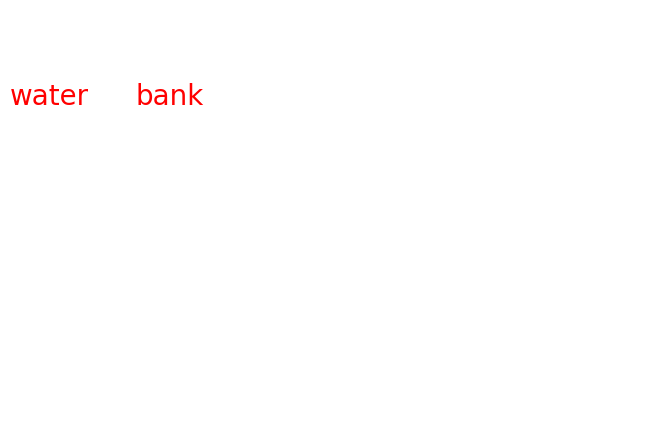

In [18]:
bow_water = ['bank','water','bank']
color_words(model, bow_water)